import libraries 

In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

Step 1

Download the MNIST dataset from kaggel and apply any preprocessing needed on the data.
Split the data randomly into being 80% training set and 20% validation set


Reading the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv("C:/Users/Doaa Samir/Documents/mnist_train.csv")
dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


extract features and labels

In [ ]:
X = dataset.drop(columns = dataset.columns[0], axis=1)
Y = dataset[dataset.columns[0]]
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting our data

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2 , random_state=42) 
print(X.shape, X_train.shape, X_valid.shape)

(60000, 784) (48000, 784) (12000, 784)


convert its type to numpy to convert it to tensor

In [ ]:
X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_valid=X_valid.to_numpy()
Y_valid=Y_valid.to_numpy()

In [ ]:
import torch
import torch.nn as nn

x=torch.tensor(X_train)
y=torch.tensor(Y_train)
xval=torch.tensor(X_valid)
yval=torch.tensor( Y_valid)
y=torch.tensor(Y_train)


In [ ]:
len(x)

48000

pixels value is between 0 and 249 and covert the labels to hard max 

CTDataset is normalizing the features (pixels values) between 0 and 1 and the labels converted it to units vector where the 1 is our location of what class it is the label determines the element with the highest value and represents its location as a one-hot vector/tensor  the known probability that an image corresponds to a certain class 

In [ ]:

class CTDataset(Dataset):
    def __init__(self, x , y):
        self.x = x
        self.y =y
        self.x = self.x/255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self): 
        return self.x.shape[0] #make the length of the data as the number of examples
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix] # returns the data set objects

In [ ]:
train_ds = CTDataset(x,y)
val_ds = CTDataset(xval,yval)

In [ ]:
len(train_ds)


48000

Step 2
Build a neural network architecture from scratch using PyTorch. The network should have at
least two hidden layers and should use ReLU activation function between hidden layers. You
can change the number of hidden layers, number of perceptrons in each layer based on your
own preferences.
Train the model using:
• Optimizer: Adam
• Learning rate : 0.01
• Loss Function: Cross Entropy
Plot the following
• Training / Validation Loss.
• Training / Validation Accuracy.


devide the data to batches 

In [ ]:
train_dl = DataLoader(train_ds, batch_size=200) #devide the data to batches of size 200
valid_dl = DataLoader(val_ds , batch_size=200)

In [ ]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        # self.dp = nn.Dropout(0.2)
        # self.ln=nn.LayerNorm([10, * ])
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        # x = self.dp(x)
        x = self.R(self.Matrix2(x))
        # x = self.ln(x)

        x = self.Matrix3(x)
        return x.squeeze()

In [ ]:
f = MyNeuralNet()

In [ ]:
def train_model1(dl,dv, f, n_epochs=10):
    # Optimization
    opt =optim.Adam(f.parameters(), lr=0.01)
    
    L = nn.CrossEntropyLoss()

    # Train model
    num_epochs = 10
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(n_epochs):
        running_loss = 0.0
        running_acc = 0.0
        val_loss = 0.0
        val_acc = 0.0
        print(f'Epoch {epoch}')
        N = len(dl)
        f.train()  
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            outputs=f(x)
            loss = L(f(x), y) 
            loss.backward() 
            opt.step() 
            # Store training data
            running_loss += loss.item()
            _, preds1 = torch.max(y.data, 1)
            _, preds = torch.max(outputs.data, 1)
            running_acc += torch.sum(preds == preds1)
           
        f.eval()    
        for i, (x, y) in enumerate(dv):
            # Update the weights of the network
            outputs=f(x)
            loss = L(f(x), y) 

            # Store training data
            val_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            _, preds1 = torch.max(y.data, 1)
            val_acc += torch.sum(preds == preds1 )

           # Calculate the average losses and accuracies for the epoch
        train_loss = running_loss / len(train_dl)
        train_acc = running_acc.float() / len(train_ds)
        val_loss /= len(valid_dl)
        val_acc = val_acc.float() / len(val_ds)

        # Print the progress for the epoch
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))
    
        # Store the losses and accuracies for plotting later
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses ,train_accs ,val_losses ,val_accs

In [ ]:
tl,tc,vl,vc=train_model1(train_dl,valid_dl, f)

Epoch 0
Epoch [1/10], Train Loss: 0.3089, Train Acc: 0.9059, Val Loss: 0.1616, Val Acc: 0.9517
Epoch 1
Epoch [2/10], Train Loss: 0.1279, Train Acc: 0.9606, Val Loss: 0.1242, Val Acc: 0.9645
Epoch 2
Epoch [3/10], Train Loss: 0.0989, Train Acc: 0.9701, Val Loss: 0.1188, Val Acc: 0.9672
Epoch 3
Epoch [4/10], Train Loss: 0.0796, Train Acc: 0.9745, Val Loss: 0.1321, Val Acc: 0.9643
Epoch 4
Epoch [5/10], Train Loss: 0.0670, Train Acc: 0.9794, Val Loss: 0.1469, Val Acc: 0.9628
Epoch 5
Epoch [6/10], Train Loss: 0.0650, Train Acc: 0.9799, Val Loss: 0.1386, Val Acc: 0.9656
Epoch 6
Epoch [7/10], Train Loss: 0.0567, Train Acc: 0.9814, Val Loss: 0.1552, Val Acc: 0.9644
Epoch 7
Epoch [8/10], Train Loss: 0.0576, Train Acc: 0.9820, Val Loss: 0.1483, Val Acc: 0.9673
Epoch 8
Epoch [9/10], Train Loss: 0.0535, Train Acc: 0.9841, Val Loss: 0.1389, Val Acc: 0.9707
Epoch 9
Epoch [10/10], Train Loss: 0.0495, Train Acc: 0.9854, Val Loss: 0.1648, Val Acc: 0.9697


In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation losses
def plotting(tl , vl) :
 plt.plot(tl, label='Train')
 plt.plot(vl, label='Validation')
 plt.title('Loss')
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.legend()
 plt.show()


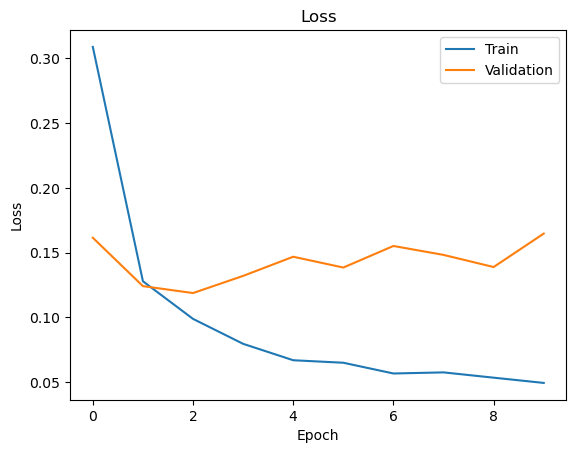

In [ ]:
plotting(tl , vl)

In [ ]:

# Plot the training and validation accuracies
def plotaccuracy(tc, vc):
 plt.plot(tc, label='Train')
 plt.plot(vc, label='Validation')
 plt.title('Accuracy')
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.legend()
 plt.show()

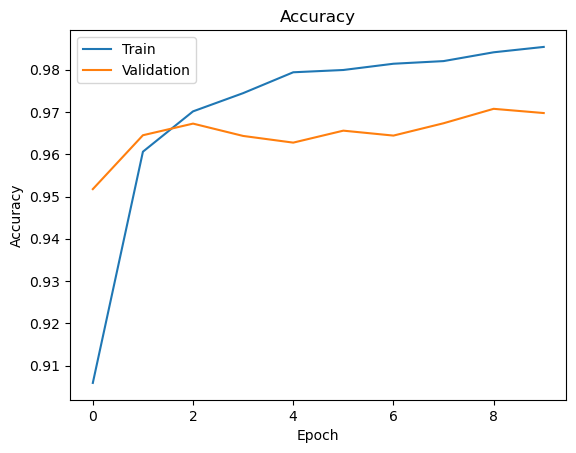

In [ ]:
plotaccuracy(tc, vc)

step 3
Add Dropout and Layer Normalization layers to your model’s architecture. Retrain the model
and compare the following plots


In [ ]:
class MyNeuralNet2(nn.Module):
     def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.dp = nn.Dropout(0.3)
        self.ln=torch.nn.LayerNorm(100, elementwise_affine = False)
        self.ln2=torch.nn.LayerNorm(50, elementwise_affine = False)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
     def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.ln(x)
        x = self.dp(x)
        x=self.Matrix2(x)
        x = self.R(self.ln2(x))

        x = self.Matrix3(x)
        return x.squeeze()

In [ ]:
f2 = MyNeuralNet2()

In [ ]:
tl,tc,vl,vc=train_model1(train_dl,valid_dl, f2)

Epoch 0
Epoch [1/10], Train Loss: 0.3547, Train Acc: 0.8958, Val Loss: 0.1547, Val Acc: 0.9520
Epoch 1
Epoch [2/10], Train Loss: 0.1841, Train Acc: 0.9441, Val Loss: 0.1284, Val Acc: 0.9611
Epoch 2
Epoch [3/10], Train Loss: 0.1501, Train Acc: 0.9540, Val Loss: 0.1068, Val Acc: 0.9683
Epoch 3
Epoch [4/10], Train Loss: 0.1306, Train Acc: 0.9587, Val Loss: 0.1056, Val Acc: 0.9695
Epoch 4
Epoch [5/10], Train Loss: 0.1184, Train Acc: 0.9629, Val Loss: 0.0981, Val Acc: 0.9721
Epoch 5
Epoch [6/10], Train Loss: 0.1084, Train Acc: 0.9661, Val Loss: 0.0901, Val Acc: 0.9743
Epoch 6
Epoch [7/10], Train Loss: 0.0965, Train Acc: 0.9690, Val Loss: 0.0883, Val Acc: 0.9738
Epoch 7
Epoch [8/10], Train Loss: 0.0917, Train Acc: 0.9704, Val Loss: 0.0871, Val Acc: 0.9744
Epoch 8
Epoch [9/10], Train Loss: 0.0883, Train Acc: 0.9721, Val Loss: 0.0850, Val Acc: 0.9753
Epoch 9
Epoch [10/10], Train Loss: 0.0839, Train Acc: 0.9733, Val Loss: 0.0892, Val Acc: 0.9742


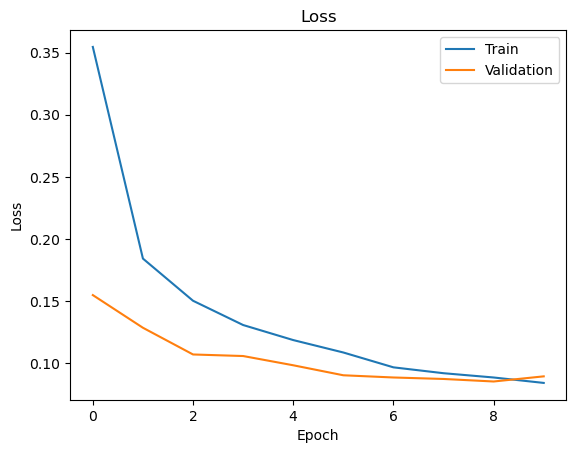

In [ ]:
plotting(tl , vl)

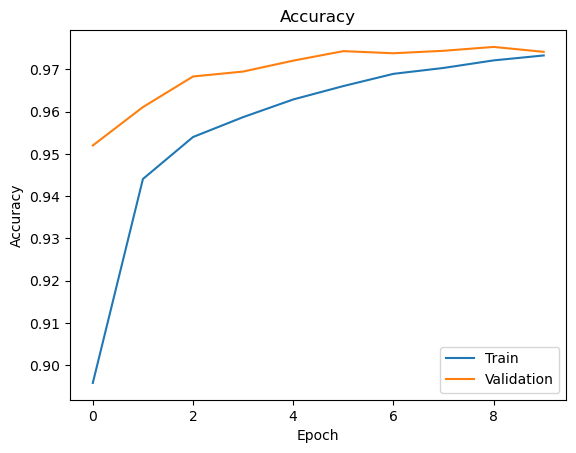

In [ ]:
plotaccuracy(tc, vc)

Step 4
Train 3 more model based on the model architecture you chose in step 3. For each model you
will change the following:
• Learning Rate (0.001, 0.0005, 0.0001).
• Probability of Dropout. (0.2, 0.4, 0.6).
Report same plots and comparisons requested in step 3.


In [ ]:
class MyNeuralNet3(nn.Module):
     def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.dp = nn.Dropout(0.2)
        self.ln=torch.nn.LayerNorm(100, elementwise_affine = False)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
     def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.ln(x) 
        x = self.dp(x)
        x = self.R(self.Matrix2(x))
       

        x = self.Matrix3(x)
        return x.squeeze()

In [ ]:
def train_model2(dl,dv, f, n_epochs=10):
    # Optimization
    opt =optim.Adam(f.parameters(), lr=0.001)
    
    L = nn.CrossEntropyLoss()

    # Train model
    num_epochs = 10
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(n_epochs):
        running_loss = 0.0
        running_acc = 0.0
        val_loss = 0.0
        val_acc = 0.0
        print(f'Epoch {epoch}')
        N = len(dl)
        f.train()  
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            outputs=f(x)
            loss = L(f(x), y) 
            loss.backward() 
            opt.step() 
            # Store training data
            running_loss += loss.item()
            _, preds1 = torch.max(y.data, 1)
            _, preds = torch.max(outputs.data, 1)
            running_acc += torch.sum(preds == preds1)
           
        f.eval()    
        for i, (x, y) in enumerate(dv):
            # Update the weights of the network
            outputs=f(x)
            loss = L(f(x), y) 

            # Store training data
            val_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            _, preds1 = torch.max(y.data, 1)
            val_acc += torch.sum(preds == preds1 )

           # Calculate the average losses and accuracies for the epoch
        train_loss = running_loss / len(train_dl)
        train_acc = running_acc.float() / len(train_ds)
        val_loss /= len(valid_dl)
        val_acc = val_acc.float() / len(val_ds)

        # Print the progress for the epoch
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))
    
        # Store the losses and accuracies for plotting later
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses ,train_accs ,val_losses ,val_accs

In [ ]:
f3 = MyNeuralNet3()

In [ ]:
tl,tc,vl,vc=train_model2(train_dl,valid_dl, f3)

Epoch 0
Epoch [1/10], Train Loss: 0.4574, Train Acc: 0.8850, Val Loss: 0.1876, Val Acc: 0.9409
Epoch 1
Epoch [2/10], Train Loss: 0.1810, Train Acc: 0.9477, Val Loss: 0.1383, Val Acc: 0.9586
Epoch 2
Epoch [3/10], Train Loss: 0.1365, Train Acc: 0.9589, Val Loss: 0.1238, Val Acc: 0.9613
Epoch 3
Epoch [4/10], Train Loss: 0.1116, Train Acc: 0.9658, Val Loss: 0.1114, Val Acc: 0.9659
Epoch 4
Epoch [5/10], Train Loss: 0.0978, Train Acc: 0.9703, Val Loss: 0.0997, Val Acc: 0.9683
Epoch 5
Epoch [6/10], Train Loss: 0.0863, Train Acc: 0.9727, Val Loss: 0.0984, Val Acc: 0.9701
Epoch 6
Epoch [7/10], Train Loss: 0.0762, Train Acc: 0.9760, Val Loss: 0.0963, Val Acc: 0.9713
Epoch 7
Epoch [8/10], Train Loss: 0.0725, Train Acc: 0.9768, Val Loss: 0.0947, Val Acc: 0.9715
Epoch 8
Epoch [9/10], Train Loss: 0.0655, Train Acc: 0.9795, Val Loss: 0.0890, Val Acc: 0.9731
Epoch 9
Epoch [10/10], Train Loss: 0.0614, Train Acc: 0.9804, Val Loss: 0.0901, Val Acc: 0.9725


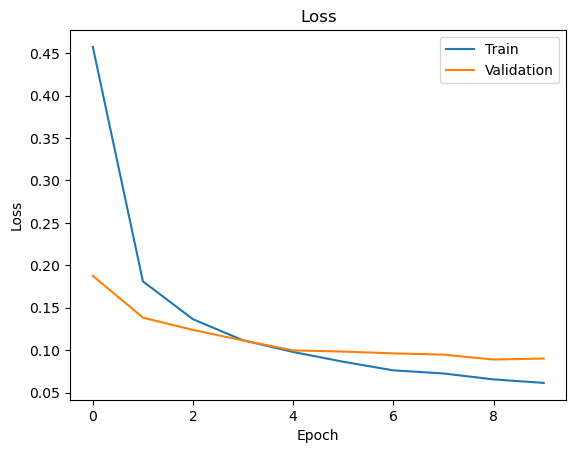

In [ ]:
plotting(tl , vl)

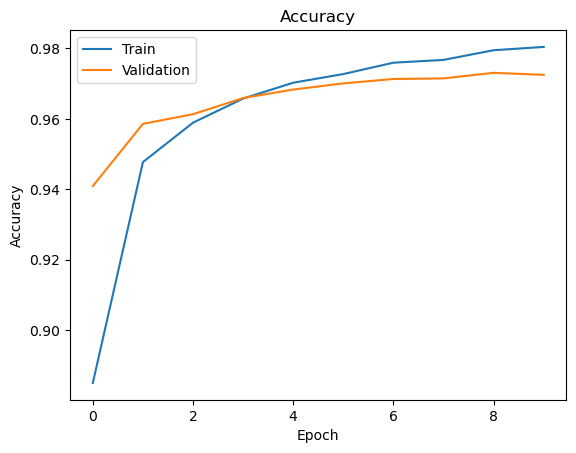

In [ ]:
plotaccuracy(tc, vc)

In [ ]:
class MyNeuralNet3(nn.Module):
     def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.dp = nn.Dropout(0.4)
        self.ln=torch.nn.LayerNorm(100, elementwise_affine = False)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
     def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.ln(x)
        x = self.dp(x)
        x = self.R(self.Matrix2(x))
    

        x = self.Matrix3(x)
        return x.squeeze()

In [ ]:
def train_model2(dl,dv, f, n_epochs=10):
    # Optimization
    opt =optim.Adam(f.parameters(), lr=0.0005)
    
    L = nn.CrossEntropyLoss()

    # Train model
    num_epochs = 10
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(n_epochs):
        running_loss = 0.0
        running_acc = 0.0
        val_loss = 0.0
        val_acc = 0.0
        print(f'Epoch {epoch}')
        N = len(dl)
        f.train()  
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            outputs=f(x)
            loss = L(f(x), y) 
            loss.backward() 
            opt.step() 
            # Store training data
            running_loss += loss.item()
            _, preds1 = torch.max(y.data, 1)
            _, preds = torch.max(outputs.data, 1)
            running_acc += torch.sum(preds == preds1)
           
        f.eval()    
        for i, (x, y) in enumerate(dv):
            # Update the weights of the network
            outputs=f(x)
            loss = L(f(x), y) 

            # Store training data
            val_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            _, preds1 = torch.max(y.data, 1)
            val_acc += torch.sum(preds == preds1 )

           # Calculate the average losses and accuracies for the epoch
        train_loss = running_loss / len(train_dl)
        train_acc = running_acc.float() / len(train_ds)
        val_loss /= len(valid_dl)
        val_acc = val_acc.float() / len(val_ds)

        # Print the progress for the epoch
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))
    
        # Store the losses and accuracies for plotting later
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses ,train_accs ,val_losses ,val_accs

In [ ]:
f3 = MyNeuralNet3()

In [ ]:
tl,tc,vl,vc=train_model2(train_dl,valid_dl, f3)

Epoch 0
Epoch [1/10], Train Loss: 0.6737, Train Acc: 0.8253, Val Loss: 0.2497, Val Acc: 0.9293
Epoch 1
Epoch [2/10], Train Loss: 0.2619, Train Acc: 0.9254, Val Loss: 0.1808, Val Acc: 0.9467
Epoch 2
Epoch [3/10], Train Loss: 0.2049, Train Acc: 0.9399, Val Loss: 0.1515, Val Acc: 0.9548
Epoch 3
Epoch [4/10], Train Loss: 0.1733, Train Acc: 0.9480, Val Loss: 0.1338, Val Acc: 0.9595
Epoch 4
Epoch [5/10], Train Loss: 0.1560, Train Acc: 0.9535, Val Loss: 0.1234, Val Acc: 0.9646
Epoch 5
Epoch [6/10], Train Loss: 0.1391, Train Acc: 0.9571, Val Loss: 0.1151, Val Acc: 0.9664
Epoch 6
Epoch [7/10], Train Loss: 0.1275, Train Acc: 0.9603, Val Loss: 0.1079, Val Acc: 0.9682
Epoch 7
Epoch [8/10], Train Loss: 0.1220, Train Acc: 0.9626, Val Loss: 0.1075, Val Acc: 0.9675
Epoch 8
Epoch [9/10], Train Loss: 0.1163, Train Acc: 0.9636, Val Loss: 0.1015, Val Acc: 0.9711
Epoch 9
Epoch [10/10], Train Loss: 0.1076, Train Acc: 0.9664, Val Loss: 0.1005, Val Acc: 0.9698


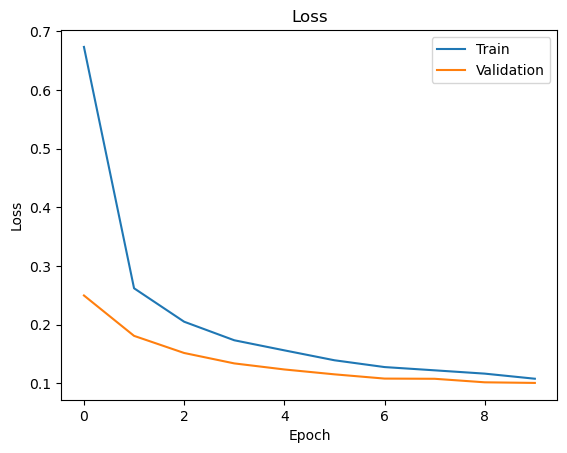

In [ ]:
plotting(tl , vl)

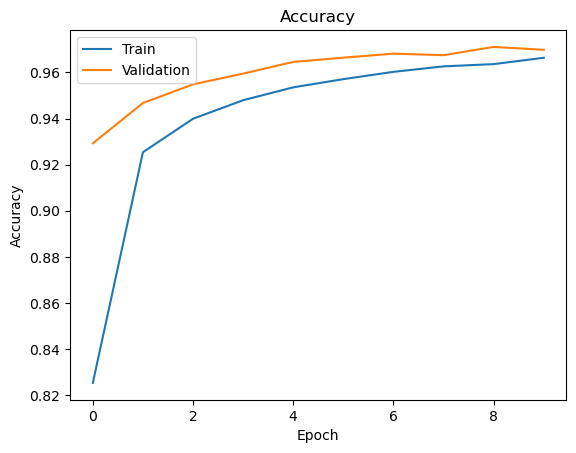

In [ ]:
plotaccuracy(tc, vc)

In [ ]:
class MyNeuralNet3(nn.Module):
     def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.dp = nn.Dropout(0.6)
        self.ln=torch.nn.LayerNorm(100, elementwise_affine = False)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
     def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.ln(x)
        x = self.dp(x) 
        x = self.R(self.Matrix2(x))
       

        x = self.Matrix3(x)
        return x.squeeze()

In [ ]:
def train_model2(dl,dv, f, n_epochs=10):
    # Optimization
    opt =optim.Adam(f.parameters(), lr=0.0001)
    
    L = nn.CrossEntropyLoss()

    # Train model
    num_epochs = 10
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(n_epochs):
        running_loss = 0.0
        running_acc = 0.0
        val_loss = 0.0
        val_acc = 0.0
        print(f'Epoch {epoch}')
        N = len(dl)
        f.train()  
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad() 
            outputs=f(x)
            loss = L(f(x), y) 
            loss.backward() 
            opt.step() 
            # Store training data
            running_loss += loss.item()
            _, preds1 = torch.max(y.data, 1)
            _, preds = torch.max(outputs.data, 1)
            running_acc += torch.sum(preds == preds1)
           
        f.eval()    
        for i, (x, y) in enumerate(dv):
            # Update the weights of the network
            outputs=f(x)
            loss = L(f(x), y) 

            # Store training data
            val_loss += loss.item()
            _, preds = torch.max(outputs.data, 1)
            _, preds1 = torch.max(y.data, 1)
            val_acc += torch.sum(preds == preds1 )

           # Calculate the average losses and accuracies for the epoch
        train_loss = running_loss / len(train_dl)
        train_acc = running_acc.float() / len(train_ds)
        val_loss /= len(valid_dl)
        val_acc = val_acc.float() / len(val_ds)

        # Print the progress for the epoch
        print('Epoch [{}/{}], Train Loss: {:.4f}, Train Acc: {:.4f}, Val Loss: {:.4f}, Val Acc: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, train_acc, val_loss, val_acc))
    
        # Store the losses and accuracies for plotting later
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    return train_losses ,train_accs ,val_losses ,val_accs

In [ ]:
f3 = MyNeuralNet3()

In [ ]:
tl,tc,vl,vc=train_model2(train_dl,valid_dl, f3)

Epoch 0
Epoch [1/10], Train Loss: 1.5319, Train Acc: 0.5903, Val Loss: 0.8724, Val Acc: 0.8555
Epoch 1
Epoch [2/10], Train Loss: 0.7532, Train Acc: 0.8347, Val Loss: 0.4582, Val Acc: 0.8991
Epoch 2
Epoch [3/10], Train Loss: 0.5040, Train Acc: 0.8771, Val Loss: 0.3357, Val Acc: 0.9128
Epoch 3
Epoch [4/10], Train Loss: 0.4096, Train Acc: 0.8911, Val Loss: 0.2855, Val Acc: 0.9187
Epoch 4
Epoch [5/10], Train Loss: 0.3585, Train Acc: 0.9002, Val Loss: 0.2559, Val Acc: 0.9243
Epoch 5
Epoch [6/10], Train Loss: 0.3317, Train Acc: 0.9062, Val Loss: 0.2380, Val Acc: 0.9282
Epoch 6
Epoch [7/10], Train Loss: 0.3079, Train Acc: 0.9108, Val Loss: 0.2226, Val Acc: 0.9332
Epoch 7
Epoch [8/10], Train Loss: 0.2917, Train Acc: 0.9167, Val Loss: 0.2108, Val Acc: 0.9367
Epoch 8
Epoch [9/10], Train Loss: 0.2750, Train Acc: 0.9195, Val Loss: 0.2008, Val Acc: 0.9383
Epoch 9
Epoch [10/10], Train Loss: 0.2664, Train Acc: 0.9206, Val Loss: 0.1917, Val Acc: 0.9424


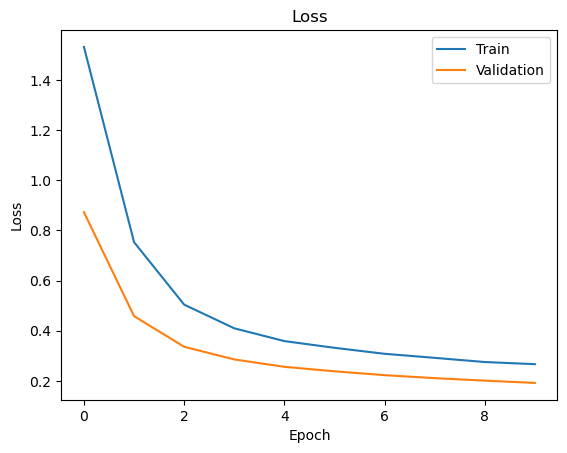

In [ ]:
plotting(tl , vl)

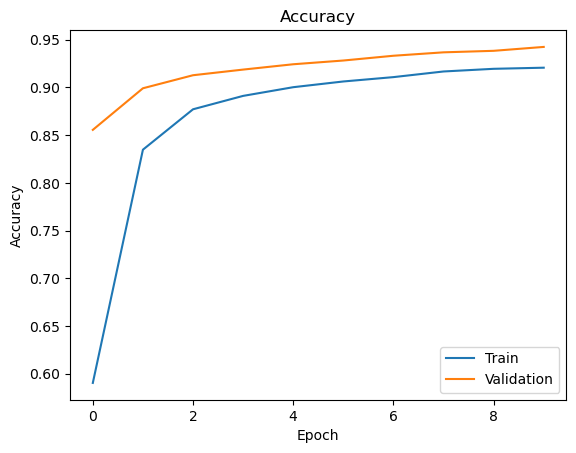

In [ ]:
plotaccuracy(tc, vc)